# Computer Vision Projects

## Mosaicing and image stiching

In [1]:
import utils
import cv2
import matplotlib.pyplot as plt

Abrimos la imagen de referencia y buscamos los 200 keypoints mas relevantes

The number of keypoints with sift is 4187


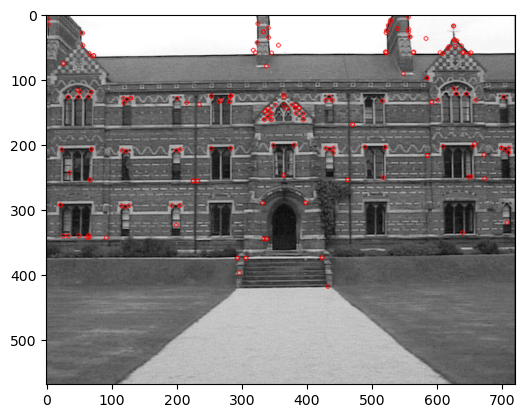

In [2]:
reference_image = cv2.imread('./images/keble_b.jpg', cv2.IMREAD_GRAYSCALE)
kp_ref, d_ref = utils.get_the_N_information(reference_image)

Tomamos la primera imagen con la que vamos a realizar la imagen panoramica y buscarmos 200 keypoints mas relevantes

The number of keypoints with sift is 4014


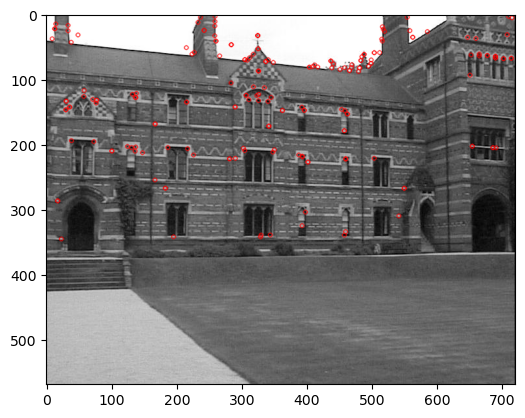

In [3]:
image_right = cv2.imread('./images/keble_c.jpg', cv2.IMREAD_GRAYSCALE)
kp_right, d_right = utils.get_the_N_information(image_right)

De las 200 corespondencias llevamos a cabo brute force matching, luego se le aplica 1NN/2NN ratio test y cross validation para obtener las mejores correspondencias

In [4]:
# Create the correspondances
correspondances = utils.create_correspondances(d_right, d_ref)
print('There are {} correspondances out of 200.'.format(len(correspondances)))

There are 56 correspondances out of 200.


En la siguiente imagen podemos ver como matchean las correspondencias entre la imagen de referencia que esta a la derecha de la misma y la primera imagen que vamos a transformar en la panoramica.

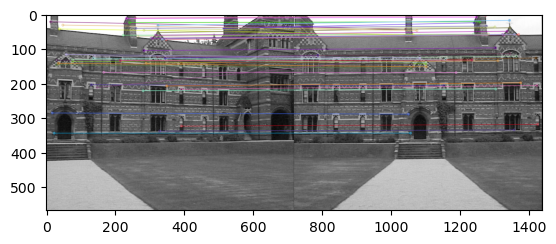

(<matplotlib.image.AxesImage at 0x14504a540>, None)

In [5]:
# Show the matches
matches = cv2.drawMatches(image_right, kp_right, reference_image, kp_ref, correspondances, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matches),plt.show()

Ahora vamos a hacer mediante RANSAC, la estimacion de la homografia H. Finalmente con esta matriz H creamos la panorama

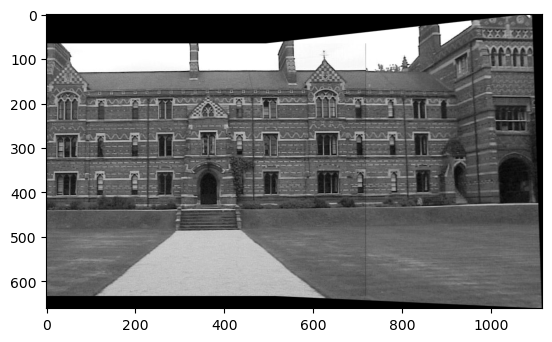

In [6]:
p1, p2 = utils.get_points(correspondances, kp_right, kp_ref)
H, inliners = utils.RANSAC(p1, p2, 10)
first_panorama = utils.create_panorama(reference_image, image_right, H)
plt.imshow(first_panorama, cmap='gray')

Ahora, repetimos el proceso con la imagen de la izquierda

The number of keypoints with sift is 4055


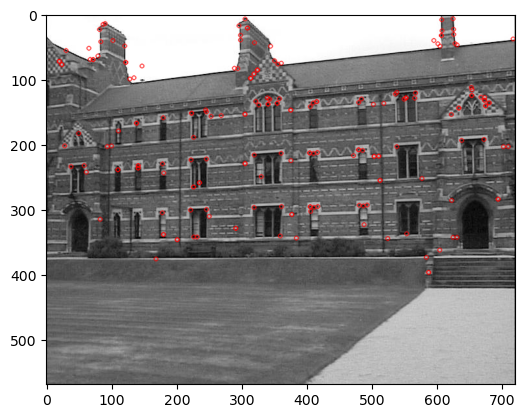

In [13]:
image_left = cv2.imread('./images/keble_a.jpg', cv2.IMREAD_GRAYSCALE)
kp_left, d_left = utils.get_the_N_information(image_left)

The number of keypoints with sift is 6025


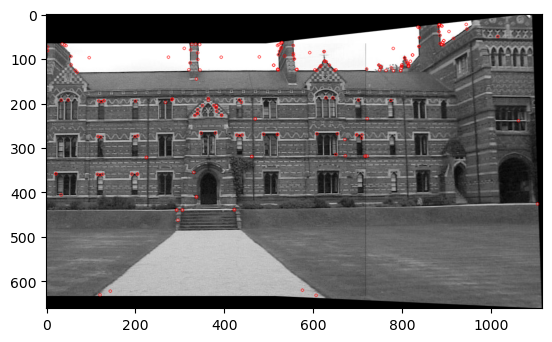

In [25]:
kp_pan, d_pan = utils.get_the_N_information(first_panorama)

In [29]:
correspondances_2 = utils.create_correspondances(d_left, d_pan)
print('There are {} correspondances out of 200.'.format(len(correspondances_2)))

There are 34 correspondances out of 200.


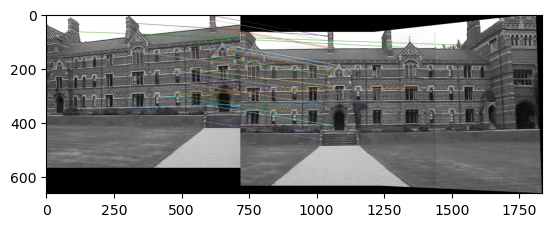

(<matplotlib.image.AxesImage at 0x1452e6bd0>, None)

In [34]:
matches = cv2.drawMatches(image_left, kp_left, first_panorama, kp_pan, correspondances_2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matches),plt.show()

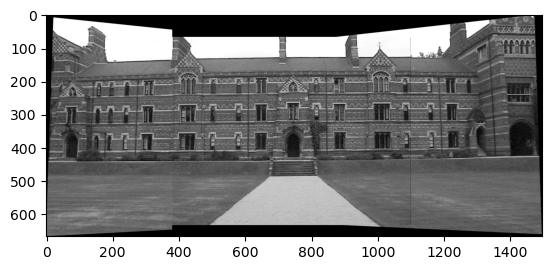

In [42]:
p1_2, p2_2 = utils.get_points(correspondances_2, kp_left, kp_pan)
H_2, inliners_2 = utils.RANSAC(p1_2, p2_2, 300)
final_panorama = utils.create_panorama(first_panorama, image_left, H_2)
plt.imshow(final_panorama, cmap='gray')

Finalmente, ahora abrimos las imagenes en color para tener la imagen panoramica en color 

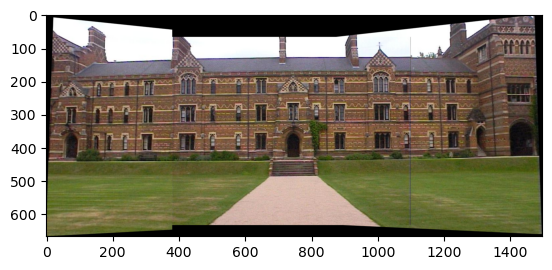

(<matplotlib.image.AxesImage at 0x14a8b00e0>, None)

In [66]:
img_a = cv2.cvtColor(cv2.imread('images/keble_a.jpg'), cv2.COLOR_BGR2RGB)
img_b = cv2.cvtColor(cv2.imread('images/keble_b.jpg'), cv2.COLOR_BGR2RGB)
img_c = cv2.cvtColor(cv2.imread('images/keble_c.jpg'), cv2.COLOR_BGR2RGB)

first_panorama_color = utils.create_panorama(img_b, img_c, H)
final_panorama_color = utils.create_panorama(first_panorama_color, img_a, H_2)
plt.imshow(final_panorama_color),plt.show()

## FAST Descriptors